# Tutorial for one-photon imaging dataset.

This tutorial shows how to access the *Two Photon dataset* using `pynwb`. 

This dataset contains the 2-photon calcium imaging holographic stimulation data and visual stimuli events.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Imaging](#access-imaging)
- [Access TTL Signals](#ttl-signals)
- [Access Wheel Signal](#wheel-signal)
- [Access Raw Behavior](#raw-behavior)
- [Access Processed Behavior](#processed-behavior)
- [Access Visual Stimulus](#access-visualstim)

A schematic representation where the source data is saved in NWB:

![Alt text](./conversion_outline_diagram.png)

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path

# Choose which epoch to explore
session_id = '04072021_am2psi_05_spont'

# The file path to a .nwb file
root_path = Path("/media/amtra/Samsung_T5/CN_data")
output_dir_path = root_path / "Higley-conversion_nwb/nwb_stub/"
nwbfile_path = output_dir_path / f"{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

root pynwb.file.NWBFile at 0x140677318163232
Fields:
  acquisition: {
    TwoPhotonSeriesGreenChannel <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    TwoPhotonMicroscope <class 'pynwb.device.Device'>
  }
  experimenter: ['Last, First Middle']
  file_create_date: [datetime.datetime(2024, 5, 14, 15, 44, 34, 999637, tzinfo=tzoffset(None, 7200))]
  identifier: 8c0fb404-fb0e-47f1-9dc1-3688dd22af7b
  imaging_planes: {
    ImagingPlaneGreenChannel <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Institution where the lab is located
  lab: Higley
  session_description: A rich text description of the experiment. Can also just be the abstract of the publication.
  session_id: 04072021_am2psi_05_spont
  session_start_time: 2021-04-07 11:55:31.499000+02:00
  subject: subject pynwb.file.Subject at 0x140677318164336
Fields:
  age: P1W2D
  age__reference: birth
  sex: U
  species: Rattus norvegicus
  subject_id: am2psi

  timestamps_reference_time: 2021-04-07 11:55:31.499000+02:00

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the ScanImage metadata (`epoch`) of the first .tiff of the epoch.

In [2]:
nwbfile.session_start_time

datetime.datetime(2021, 4, 7, 11, 55, 31, 499000, tzinfo=tzoffset(None, 7200))

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x140677318164336
Fields:
  age: P1W2D
  age__reference: birth
  sex: U
  species: Rattus norvegicus
  subject_id: am2psi

# Access OnePhoton Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw Two Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw OnePhoton Imaging

The raw TwoPhoton imaging data is stored in `pynwb.ophys.TwoPhotonSeries` objects (for each channel and excitation type separately) which is added to `nwbfile.acquisition`. The data can be accessed as `nwbfile.acquisition['TwoPhotonSeries_color_Channel']`.

The data in [TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [4]:
names_of_photon_series = nwbfile.acquisition.keys()
_ = [print(name) for name in names_of_photon_series if "TwoPhotonSeries" in name ]

TwoPhotonSeriesGreenChannel


In [5]:
photon_series = nwbfile.acquisition["TwoPhotonSeriesGreenChannel"]

In [6]:
photon_series.imaging_plane.indicator

'GCaMP6s'

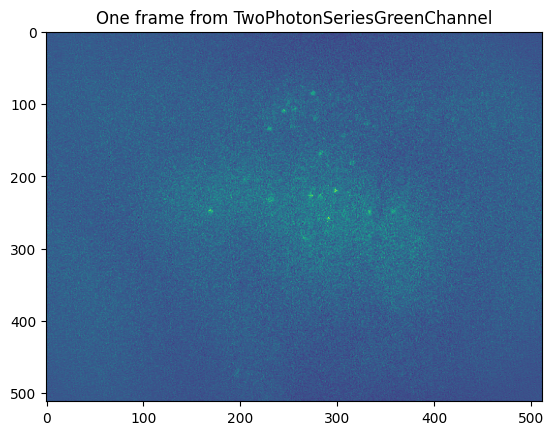

In [8]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

plt.imshow(photon_series.data[10], aspect="auto")
plt.title(f"One frame from TwoPhotonSeriesGreenChannel")
plt.show()


In [9]:
photon_series.rate

15.214201117893856

In [10]:
photon_series.starting_time

0.0